In [1]:
# Exploración dataset TOI
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

sns.set_theme(style="whitegrid", context="notebook", rc={"figure.figsize": (8,4)})

# Cargar datos filtrados
DATA_PATH = "../FilteredData/TOI_All_Filtrated.csv"
toi = pd.read_csv(DATA_PATH)

print("Dimensiones:", toi.shape)
print("\nColumnas:")
print(toi.columns.tolist())

display(toi.head())

Dimensiones: (7699, 12)

Columnas:
['pl_orbper', 'pl_trandurh', 'pl_trandep', 'pl_rade', 'pl_insol', 'pl_eqt', 'st_teff', 'st_rad', 'st_logg', 'st_tmag', 'st_dist', 'tfopwg_disp']


,pl_orbper,pl_trandurh,pl_trandep,pl_rade,pl_insol,pl_eqt,st_teff,st_rad,st_logg,st_tmag,st_dist,tfopwg_disp
0,2.171348,2.01722,656.886099,5.818163,22601.948581,3127.204052,10249.0,2.169860,4.19000,9.604000,485.735,FP
1,1.931646,3.16600,1286.000000,11.215400,44464.500000,4045.000000,7070.0,2.010000,4.03000,9.423440,295.862,PC
2,1.867557,1.40800,1500.000000,23.752900,2860.610000,2037.000000,8924.0,5.730000,3.46236,9.299501,943.109,FP
3,2.743230,3.16700,383.410000,3.290788,1177.360000,1631.000000,5388.5,1.504181,4.15000,9.300300,7728.170,FP
4,3.573014,3.37000,755.000000,11.311300,54679.300000,4260.000000,9219.0,2.150000,4.14000,9.135500,356.437,FP


Dimensiones del dataset: (7699, 12)
Columnas: ['pl_orbper', 'pl_trandurh', 'pl_trandep', 'pl_rade', 'pl_insol', 'pl_eqt', 'st_teff', 'st_rad', 'st_logg', 'st_tmag', 'st_dist', 'tfopwg_disp']

Distribución de clases:
             Frecuencia  Porcentaje (%)
tfopwg_disp                            
PC                 4678           60.76
FP                 1196           15.53
CP                  683            8.87
KP                  583            7.57
APC                 461            5.99
FA                   98            1.27


/tmp/ipykernel_80004/2830907704.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=toi, x=target_col, order=class_counts.index, palette="Set2")
/tmp/ipykernel_80004/2830907704.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pct = class_percent[i]


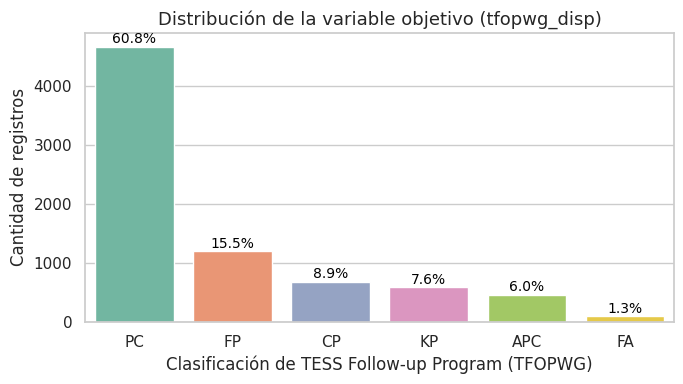

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética
sns.set_theme(style="whitegrid", palette="muted")

# Cargar el dataset filtrado
data_path = "../FilteredData/TOI_All_Filtrated.csv"
toi = pd.read_csv(data_path)

# Comprobar la estructura
print("Dimensiones del dataset:", toi.shape)
print("Columnas:", toi.columns.tolist())

# Contar las clases de la variable target
target_col = "tfopwg_disp"
class_counts = toi[target_col].value_counts()
class_percent = toi[target_col].value_counts(normalize=True) * 100

# Mostrar resultados en consola
print("\nDistribución de clases:")
print(pd.DataFrame({
    "Frecuencia": class_counts,
    "Porcentaje (%)": class_percent.round(2)
}))

# Gráfico de barras
plt.figure(figsize=(7, 4))
sns.countplot(data=toi, x=target_col, order=class_counts.index, palette="Set2")

plt.title("Distribución de la variable objetivo (tfopwg_disp)", fontsize=13)
plt.xlabel("Clasificación de TESS Follow-up Program (TFOPWG)")
plt.ylabel("Cantidad de registros")

# Mostrar porcentajes sobre las barras
for i, count in enumerate(class_counts):
    pct = class_percent[i]
    plt.text(i, count + 5, f"{pct:.1f}%", ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [2]:
# Copia del dataset
df_toi = toi.copy()

# Codificar la variable objetivo (texto → número)
le = LabelEncoder()
df_toi["tfopwg_disp_encoded"] = le.fit_transform(df_toi["tfopwg_disp"])

# Separar features numéricos y target
X = df_toi.select_dtypes(include=[np.number]).drop(columns=["tfopwg_disp_encoded"])
y = df_toi["tfopwg_disp_encoded"]

# Entrenar Random Forest
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf.fit(X, y)

# Calcular importancia
importances = rf.feature_importances_
feature_names = X.columns

feat_imp_toi = pd.DataFrame({
    "Variable": feature_names,
    "Importancia (%)": 100 * importances / importances.sum()
}).sort_values("Importancia (%)", ascending=False)

print("Top 10 variables más importantes:")
display(feat_imp_toi.head(10))

Top 10 variables más importantes:


,Variable,Importancia (%)
9,st_tmag,13.190682
10,st_dist,10.312382
3,pl_rade,9.804580
2,pl_trandep,9.604236
0,pl_orbper,8.877243
4,pl_insol,8.779490
1,pl_trandurh,8.763336
5,pl_eqt,8.308323
6,st_teff,7.782430
7,st_rad,7.430360


/tmp/ipykernel_46444/2665792821.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


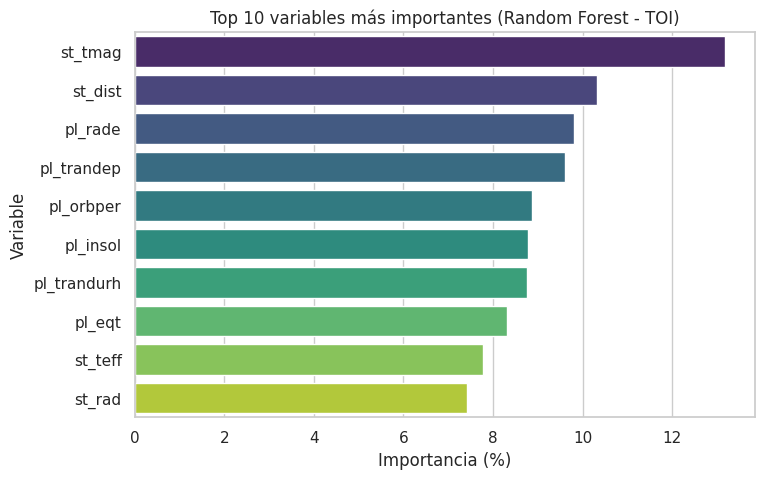

In [3]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=feat_imp_toi.head(10),
    x="Importancia (%)",
    y="Variable",
    palette="viridis"
)
plt.title("Top 10 variables más importantes (Random Forest - TOI)")
plt.xlabel("Importancia (%)")
plt.ylabel("Variable")
plt.show()

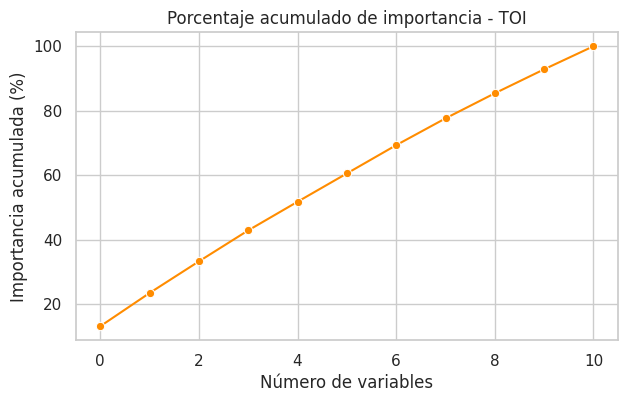

In [4]:
feat_imp_toi["Acumulado (%)"] = feat_imp_toi["Importancia (%)"].cumsum()

plt.figure(figsize=(7,4))
sns.lineplot(
    data=feat_imp_toi,
    x=range(len(feat_imp_toi)),
    y="Acumulado (%)",
    marker="o",
    color="darkorange"
)
plt.title("Porcentaje acumulado de importancia - TOI")
plt.xlabel("Número de variables")
plt.ylabel("Importancia acumulada (%)")
plt.grid(True)
plt.show()